In [11]:
import pandas as pd
df_companies = pd.read_csv('/home/op/kernel/thesis/data/orbis/companies.csv', index_col=0)
df_companies['shareholders']=0
df_companies['subsidiaries']=0
df_companies['corporate_group']=0
df_companies['orbis']=False
df_companies.head()


,company,country,role,score,shareholders,subsidiaries,corporate_group,orbis
737432500,Octopus Liegenschaftsverwaltungsgesellschaft m...,Austria,GUO,107,0,0,0,False
281236465,Aleris Aluminum Vogt GmbH,Denmark,GUO,57,0,0,0,False
125210818,EPF Neli OÜ,Estonia,GUO,52,0,0,0,False
10385542,Treveria D S.à r.l.,Luxembourg,GUO,42,0,0,0,False
413788916,Venetsalo Holdings Limited,Cyprus,GUO,37,0,0,0,False


In [12]:
import os, re
dir_path = '/home/op/kernel/thesis/data/orbis/ocr_ownership/'
patterns = {'shareholder':'shareholders','subsidiar':'subsidiaries','compan':'corporate_group'}
file_names = []

for file in os.listdir(dir_path):
    # append all files names to a list
    if file[0]!='.' and file[-3:]=='png': #to handle issue with hidden files and non-pdf files
        file_names.append(file[:-4])
print(len(file_names))

for file in file_names:
    with open(dir_path+file+'.png.txt','r') as f:
        for line in f:
            for pattern in patterns.keys():
                s = re.match(r'([0-9]+) '+pattern, line)
                if s!=None:
                    df_companies.at[int(file), patterns[pattern]]=int(s.group(1))
                    df_companies.at[int(file), 'orbis']=True

3779


In [13]:
df_companies.to_csv('/home/op/kernel/thesis/data/orbis/df_companies.csv')

In [14]:
df_companies[df_companies['orbis']==True]

,company,country,role,score,shareholders,subsidiaries,corporate_group,orbis
281236465,Aleris Aluminum Vogt GmbH,Denmark,GUO,57.0,0.0,3.0,29.0,True
641728978,NaN,NaN,NaN,NaN,2.0,0.0,0.0,True
236612615,NaN,NaN,NaN,NaN,70.0,8.0,29.0,True
516486643,NaN,NaN,NaN,NaN,1.0,0.0,3.0,True
743155991,NaN,NaN,NaN,NaN,1.0,0.0,NaN,True
363020901,NaN,NaN,NaN,NaN,2.0,0.0,3.0,True
629431177,NaN,NaN,NaN,NaN,0.0,2.0,0.0,True
279019643,NaN,NaN,NaN,NaN,1.0,0.0,15.0,True
385199391,NaN,NaN,NaN,NaN,1.0,6.0,110.0,True
6695648,NaN,NaN,NaN,NaN,3.0,14.0,407.0,True


In [21]:
df = pd.read_csv('/home/op/kernel/thesis/data/cbm/df_companies.csv')
df['rank']=0 # transcations * size
for index in df.index:
    df.at[index, 'rank']=int(df.at[index, 'score'])*int(df.at[index, 'corporate_group'])
df.sort_values(by='rank', ascending=False)

,Unnamed: 0,company,country,role,score,shareholders,subsidiaries,corporate_group,orbis,rank
83,429354494,BNP Paribas S.A.,France,GUO,7,65,0,1648,True,11536
80,312836899,D.A.S. Rechtsschutz AG,Austria,GUO,7,2,0,912,True,6384
39,903629001,Double 1 S.p.a.,Italy,GUO,17,1,16,270,True,4590
55,450910567,SPX Flow Europe Limited,United Kingdom,GUO,12,2,2,357,True,4284
107,56236312,Metlife Europe Limited,Ireland,GUO,7,2,1,602,True,4214
61,864517511,HDI-Gerling Industrie Versicherung AG,Germany,AC,10,1,18,385,True,3850
315,519173647,CRH RomaNULLHoldings UK Limited,United Kingdom,GUO,2,3,1,1852,True,3704
56,965575650,Stryker AB,Sweden,GUO,12,2,0,290,True,3480
582,334879072,Ekspres Bank A/S,Denmark,GUO,2,2,0,1648,True,3296
12,867196406,Etermat S.A.S.,Sweden,GUO,17,3,6,187,True,3179


In [4]:
df_companies = df_companies.sort_values(by='corporate_group',ascending=False)
df_companies = df_companies.drop(columns='score')
#df_companies = df_companies.drop(columns='company')
df_companies = df_companies[df_companies['orbis']==True]
#df_companies.drop(columns=['company','score'])
#df_companies[~df_companies['corporate_group'].isin(['0'])].describe()
print(df_companies.info())
print(df_companies.describe())
df_companies.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2628 entries, 224784014 to 653447630
Data columns (total 7 columns):
company            2628 non-null object
country            2034 non-null object
role               2628 non-null object
shareholders       2628 non-null int64
subsidiaries       2628 non-null int64
corporate_group    2628 non-null int64
orbis              2628 non-null bool
dtypes: bool(1), int64(3), object(3)
memory usage: 146.3+ KB
None
       shareholders  subsidiaries  corporate_group
count   2628.000000   2628.000000      2628.000000
mean       7.388889     25.460807       172.031583
std       25.768792    136.291201      1023.602799
min        0.000000      0.000000         0.000000
25%        0.000000      0.000000         0.000000
50%        1.000000      0.000000         3.000000
75%        2.000000      4.000000        61.250000
max      617.000000   4525.000000     33403.000000


,company,country,role,shareholders,subsidiaries,corporate_group,orbis
224784014,China National Chemical Corporation,NaN,GUO,1,132,33403,True
541471207,ELKEM AS ...,Norway,AC,1,0,33403,True
552185295,Asendia Holding AG,NaN,GUO,3,19,4869,True
309881381,Aeroports de Paris,NaN,GUO,32,118,4869,True
620644292,Aeroports de Paris S.A.,Sweden,AC,32,118,4869,True


In [163]:
dft = df_companies
roles = ['GUO','AC','MC'] #ACMC #MCAC #ACMCGUO # etc
for role in roles:
    dft = df_companies[df_companies['role']==role]
    print('This is information on role ', role)
    print(dft.shape)
    print(dft.head())
    print(dft.info())
    print(dft.describe())
    print()

This is information on role  GUO
(1231, 7)
                                       company country role  shareholders  \
224784014  China National Chemical Corporation     NaN  GUO             1   
552185295                   Asendia Holding AG     NaN  GUO             3   
309881381                   Aeroports de Paris     NaN  GUO            32   
666772532                 HCA Healthcare, INC.     NaN  GUO           119   
604414675                              WPP PLC     NaN  GUO            99   

           subsidiaries  corporate_group  orbis  
224784014           132            33403   True  
552185295            19             4869   True  
309881381           118             4869   True  
666772532             0             3830   True  
604414675           613             3576   True  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1231 entries, 224784014 to 653447630
Data columns (total 7 columns):
company            1231 non-null object
country            637 non-null obj

In [5]:
df_companies.describe(percentiles=[.25, .5, .75, .95, .99])

,shareholders,subsidiaries,corporate_group
count,2628.000000,2628.000000,2628.000000
mean,7.388889,25.460807,172.031583
std,25.768792,136.291201,1023.602799
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,3.000000
75%,2.000000,4.000000,61.250000
95%,58.000000,127.000000,890.000000
99%,122.730000,490.920000,2624.000000
max,617.000000,4525.000000,33403.000000


In [164]:
df_companies[df_companies['role']=='GUO'].describe()

,shareholders,subsidiaries,corporate_group
count,1231.000000,1231.000000,1231.000000
mean,13.073111,46.872461,166.974817
std,34.798741,192.690605,1038.199018
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000
75%,4.000000,9.000000,70.000000
max,617.000000,4525.000000,33403.000000


In [165]:
df_companies[df_companies['role']=='AC'].describe()

,shareholders,subsidiaries,corporate_group
count,737.000000,737.000000,737.000000
mean,3.446404,11.537313,268.375848
std,14.687327,52.241434,1345.264146
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000
50%,1.000000,1.000000,8.000000
75%,2.000000,5.000000,181.000000
max,275.000000,787.000000,33403.000000


In [166]:
df_companies[df_companies['role']=='MC'].describe()

,shareholders,subsidiaries,corporate_group
count,660.000000,660.000000,660.000000
mean,1.189394,1.072727,73.878788
std,5.449913,5.416844,351.696332
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,2.000000,0.000000,4.000000
max,133.000000,69.000000,3830.000000


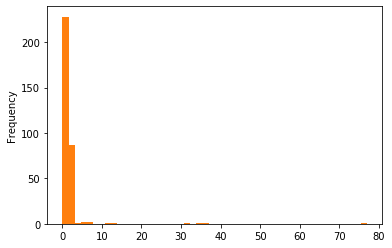

In [167]:
countries = ['Netherlands','Finland']
country = countries[1]
for country in countries:
    country = 'Germany'
    df = df_companies[df_companies['country']=='Netherlands']
    df["shareholders"].plot.hist(bins=50)

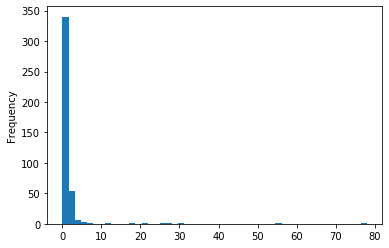

In [104]:
df_companies[df_companies['country']=='Germany']["shareholders"].plot.hist(bins=50)

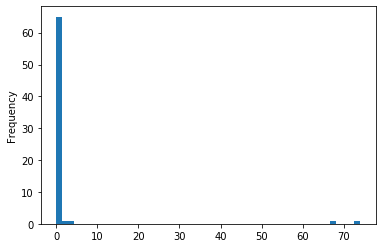

In [107]:
df_companies[df_companies['country']=='Finland']["shareholders"].plot.hist(bins=50)

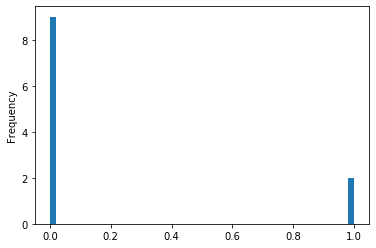

In [108]:
df_companies[df_companies['country']=='Estonia']["shareholders"].plot.hist(bins=50)

In [4]:
for index in df.index[2:10]:
    text = df.loc[index,'text']
    print(text)
    print('________________')


PATHE HOLDING BV.

AMSTERDAM, Netherlands
Business Services

PATHE HOLDING BV.

AMSTERDAM, Netherlands
Business Services

PATHE HOLDING BV
AMSTERDAM, Netherlands

Select all search results

Choose a search step from

the list to add it to your

search Favourites YY BvD indepenc
‘Company ‘YY Ultimate Owr
Identifiers Ultimate Owr
Load a search
Retrieve a search that you Location
have saved Activities and industry
Financials

Directors, managers and advisors

Loadacompanyset  ¥y9 a
________________
ECLISSES.R.L.

Pieve di Soligo, Italy
Metals & Metal Products
165.5 m USD turnover (2018), 235 employees

ECLISSES.R.L.

‘San Miniato, Italy
Business Services
1.15 USD turnover (2018)

ECLISSES.R.L.

Capri, Italy
Retail
763 th USD turnover (2018), 8 employees

ECLISSES.R.L.

Urgnano, Italy
Travel, Personal & Leisure
480 th USD turnover (2017), 6 employees

ECLISSES.R.L.

Select all search results

Loadacompanyset  ¥y4 a
________________
‘OBLIO INTERNATIONAL BY.

'S-GRAVENHAGE, Netherlands
Disso

In [ ]:
null_names = []
for name in df_companies['name']:
    if 'NULL' in name:
        null_names.append(name)
        print(name)
        
len(null_names)

In [19]:
import re

rows = []

for index in df.index[3000:]:
    text = df.loc[index,'text']
    d = {'name':None, 'candidate':None}
    if type(text)==str:
        text = text.split('\n')
        for line in text:
            upper = sum(map(str.isupper, line))
            lower = sum(map(str.islower, line))
            if upper>lower*2 and len(line)>3:
                d['name']=df.at[index,'name']
                d['candidate']=line
    rows.append(d)
df_search_results = pd.DataFrame(rows)
df_search_results

,candidate,name
0,POLO HOLDING LUXEMBOURG SARL,Polo Holding Luxembourg s.a.r.l.
1,None,None
2,HMCS-SIG LIMITED,HMCS-SIG Limited
3,‘(CROWN EXECUTIVE AVIATION LIMITED,Crown Executive Aviation Limited
4,QUAESTIO INVESTMENTS SA,Quaestio Investments S.A
5,None,None
6,None,None
7,WORKHOUSE CUSTOM CHASIS,Workhouse S.A.
8,PARTICIPATIONS ALPA SA.,Participations Alpa S.A.
9,AEQUITAS WBL LTD.,Aequitas WBL Ltd.


In [66]:
import re

rows = []

for index in df.index[0:10]:
    text = df.loc[index,'text']
    d = {'name':None, 'location':None, 'industry':None, 'info':None}
    #print(text)
    
    text = text.split('\n')
    j=len(text)
    alan = {'state':False,'memory':0}
    for i in range(len(text)):
        line = text[i]
        upper = sum(map(str.isupper, line))
        lower = sum(map(str.islower, line))
        if line=='':
            #print('arrr')
        #print(upper, line)
        if upper>lower*2:
            j=i
            d['name']=text[i]
            alan['state'] = True
            alan['memory'] = 0
        if alan['state']==True:
            if alan['memory']==0 and line==
            
        if i==j+2:
            d['location']=text[i]
        if i==j+3:
            d['industry']=text[i]
        if i==j+4:
            d['info']=text[i]
        
    rows.append(d)
df_search_results = pd.DataFrame(rows)
#match = re.findall('\n[A-Z]{2}', text)

arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr
arrr


In [60]:
rows

[{'name': 'FT IMMOBILIARE SRL ENUNCIABILE ANCHE EFFETI IMMOBILIARE SRL',
  'location': '‘Codogno, Italy',
  'industry': 'Dissolved (bankruptcy) - Property Services',
  'info': '1.50 m USD turnover (2011), 3employees'},
 {'name': 'Q',
  'location': '',
  'industry': 'YY BvD indepenc',
  'info': 'Ultimate Owr'},
 {'name': 'PATHE HOLDING BV',
  'location': '',
  'industry': 'Select all search results',
  'info': ''},
 {'name': 'ECLISSES.R.L.',
  'location': 'Select all search results',
  'industry': '',
  'info': 'Loadacompanyset  ¥y4 a'},
 {'name': '‘OBLIO INTERNATIONAL BY.',
  'location': "'S-GRAVENHAGE, Netherlands",
  'industry': 'Dissolved - Business Services',
  'info': ''},
 {'name': 'ACEM SOURCING BV.',
  'location': 'HAARLEM, Netherlands',
  'industry': 'Business Services',
  'info': ''},
 {'name': 'VIRVI BV.',
  'location': 'AMSTERDAM, Netherlands',
  'industry': 'Dissolved - Business Services',
  'info': ''},
 {'name': 'Q',
  'location': '',
  'industry': 'search Favourites YY 

In [51]:
df_search_results

,industry,info,location,name
0,Dissolved (bankruptcy) - Property Services,"1.50 m USD turnover (2011), 3employees","‘Codogno, Italy",FT IMMOBILIARE SRL ENUNCIABILE ANCHE EFFETI IM...
1,YY BvD indepenc,Ultimate Owr,,Q
2,Select all search results,,,PATHE HOLDING BV
3,,Loadacompanyset ¥y4 a,Select all search results,ECLISSES.R.L.
4,Dissolved - Business Services,,"'S-GRAVENHAGE, Netherlands",‘OBLIO INTERNATIONAL BY.
5,Business Services,,"HAARLEM, Netherlands",ACEM SOURCING BV.
6,Dissolved - Business Services,,"AMSTERDAM, Netherlands",VIRVI BV.
7,search Favourites YY BvD indepenc,‘Company ‘YY Ultimate Owr,,Q
8,YY BvD indepenc,Ultimate Owr,,Q
9,Dissolved - Business Services,,"AMSTERDAM, Netherlands",CRYSTAL CAPITAL NEDERLAND BV.
